"""


Introduction
Learning how to process text is a skill required for Data Scientists/AI Engineers.
In this project, you will put these skills into practice to identify whether a news headline is real or fake news.

Project Overview
In the file dataset/data.csv, you will find a dataset containing news articles with the following columns:

- label: 0 if the news is fake, 1 if the news is real.
- title: The headline of the news article.
- text: The full content of the article.
- subject: The category or topic of the news.
- date: The publication date of the article.
- Your goal is to build a classifier that is able to distinguish between the two.

Once you have a classifier built, then use it to predict the labels for dataset/validation_data.csv. Generate a new file where the label 2 has been replaced by 0 (fake) or 1 (real) according to your model. Please respect the original file format, do not include extra columns, and respect the column separator.

Please ensure to split the data.csv into training and test datasets before using it for model training or evaluation.

Guidance
Like in a real life scenario, you are able to make your own choices and text treatment. Use the techniques you have learned and the common packages to process this data and classify the text.

Deliverables
- Python Code: Provide well-documented Python code that conducts the analysis.
- Predictions: A csv file in the same format as validation_data.csv but with the predicted labels (0 or 1)
- Accuracy estimation: Provide the teacher with your estimation of how your model will perform.
- Presentation: You will present your model in a 10-minute presentation. Your teacher will provide further instructions.


"""

#**1)INSTALL AND IMPORT LIBRARIES**

In [1]:
!pip install nltk scikit-learn pandas matplotlib

In [2]:
import nltk
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# 2) Load DATASET
# Goal: confirm columns, size, nulls, class balance.

from google.colab import files

# Abre un cuadro de diálogo para subir archivos desde tu PC
uploaded = files.upload()

Saving training_data_lowercase.csv to training_data_lowercase.csv


In [5]:
## Read Data for the Fraudulent Email Kaggle Challenge
data_train = pd.read_csv("/content/training_data_lowercase.csv",encoding='latin-1')

# Reduce the training set to speed up development.
# Modify for final system
#data = data.head(1000)
#print(data.shape)
#data.fillna("",inplace=True)

In [8]:
# 2.1. ANALYZE DATA
data_train



,ï»¿0\tdonald trump sends out embarrassing new yearâs eve message; this is disturbing
0,0\tdrunk bragging trump staffer started russia...
1,0\tsheriff david clarke becomes an internet jo...
2,0\ttrump is so obsessed he even has obamaâs ...
3,0\tpope francis just called out donald trump d...
4,0\tracist alabama cops brutalize black boy whi...
...,...
34146,1\ttears in rain as thais gather for late king...
34147,1\tpyongyang university needs non-u.s. teacher...
34148,1\tphilippine president duterte to visit japan...
34149,"1\t""japan's abe may have won election\tbut man..."


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34151 entries, 0 to 34150
Data columns (total 1 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   ï»¿0	donald trump sends out embarrassing new yearâs eve message; this is disturbing  34151 non-null  object
dtypes: object(1)
memory usage: 266.9+ KB


In [10]:
data_train.describe()

,ï»¿0\tdonald trump sends out embarrassing new yearâs eve message; this is disturbing
count,34151
unique,32205
top,1\tfactbox: trump fills top jobs for his admin...
freq,14


In [16]:
data_train.columns

Index(['ï»¿0\tdonald trump sends out embarrassing new yearâs eve message; this is disturbing'], dtype='object')

In [21]:
 # so create the columns name
import pandas as pd

# Load the dataset correctly
data_train = pd.read_csv(
    "/content/training_data_lowercase.csv",
    sep="\t",                # tab separator
    header=None,             # no header row in file
    names=["label", "headline"]  # 2 columns only
)

# Show the first few rows
print(data_train.head())

   label                                           headline
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...


In [22]:
data_train.columns


Index(['label', 'headline'], dtype='object')

In [23]:
data_train

,label,headline
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...
...,...,...
34147,1,tears in rain as thais gather for late king's ...
34148,1,pyongyang university needs non-u.s. teachers a...
34149,1,philippine president duterte to visit japan ah...
34150,1,japan's abe may have won election\tbut many do...


In [25]:
# check missing values
data_train.isnull().sum()

,0
label,0
headline,0


In [26]:
# BALANCE: Count how many examples of each label
print(data_train['label'].value_counts())

# If you want percentages:
print(data_train['label'].value_counts(normalize=True) * 100)

label
0    17572
1    16580
Name: count, dtype: int64
label
0    51.452331
1    48.547669
Name: proportion, dtype: float64


# **Let's divide the training and validation set into two partitions**

In [35]:
# 2) Train/test split (from data.csv)
# Use stratified split on label to preserve class balance.

from sklearn.model_selection import train_test_split

# the target column is called 'label'

X = data_train.drop('label', axis=1)  # Features (independent variables)
y = data_train['label']               # Target (dependent variable)

# Split the dataset: 80% for training, 20% for validation
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display sizes of each partition
print("Training set size:", X_train.shape)
print("Validation set size:", X_test.shape)

Training set size: (27321, 1)
Validation set size: (6831, 1)


# **DATA PREPROCESSING**

In [36]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
print(string.punctuation)
print(stopwords.words("english")[100:110])
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Now, we have to clean the html code removing words**

In [37]:
import re

def clean_html(text):
    """
    Cleans HTML text by removing:
    1. Inline JavaScript and CSS
    2. HTML comments
    3. All remaining HTML tags
    """
    # Remove inline JavaScript/CSS code
    text = re.sub(r'<(script|style).*?>.*?</\1>', '', text, flags=re.DOTALL)

    # Remove HTML comments (must come before removing tags)
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)

    # Remove all remaining HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove extra whitespace and line breaks
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
#Remove all the special characters
#Remove numbers
#Remove all single characters
#Remove single characters from the start
#Substitute multiple spaces with single space
#Remove prefixed 'b'
#Convert to Lowercase

In [38]:
def normalize_text(text):
    """
    Performs general text normalization:
    - Removes special characters and punctuation
    - Removes numbers
    - Removes single characters
    - Removes single characters from start
    - Replaces multiple spaces with a single space
    - Removes prefixed 'b' (from byte strings)
    - Converts text to lowercase
    """
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove numbers
    text = re.sub(r'\d+', ' ', text)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from start
    text = re.sub(r'^[a-zA-Z]\s+', '', text)

    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)

    # Remove prefixed 'b' (from byte strings like b'text')
    text = re.sub(r'^b\s+', '', text)

    # Convert to lowercase
    text = text.lower()

    return text.strip()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# Download necessary NLTK data (stopwords, punkt, punkt_tab)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Added punkt_tab download

# Function to clean HTML
def clean_html(text):
    text = re.sub(r'<(script|style).*?>.*?</\1>', '', text, flags=re.DOTALL)
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to normalize text (from K9mV7HHbZK8L)
def normalize_text(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'^[a-zA-Z]\s+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^b\s+', '', text)
    text = text.lower()
    return text.strip()

# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(filtered_tokens)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [48]:
# Function to stem text using SnowballStemmer (from 3dc-oCHlk6jT)
def stem_text(text):
    snowball = SnowballStemmer('english')
    tokens = word_tokenize(text)
    stemmed_words = [snowball.stem(word) for word in tokens]
    return " ".join(stemmed_words)



In [52]:
# Apply cleaning and preprocessing steps
X_train_processed = X_train
X_validation_processed = X_validation

X_train_processed['headline'] = X_train_processed['headline'].apply(clean_html)
X_train_processed['headline'] = X_train_processed['headline'].apply(normalize_text)
X_train_processed['headline'] = X_train_processed['headline'].apply(remove_stopwords)
X_train_processed['headline'] = X_train_processed['headline'].apply(stem_text) # Added stemming

X_validation_processed['headline'] = X_validation_processed['headline'].apply(clean_html)
X_validation_processed['headline'] = X_validation_processed['headline'].apply(normalize_text)
X_validation_processed['headline'] = X_validation_processed['headline'].apply(remove_stopwords)
X_validation_processed['headline'] = X_validation_processed['headline'].apply(stem_text) # Added stemming

In [53]:
X_train_processed

,headline
6851,republican punish georgia governor refus legal...
17313,father soldier slain niger defend presid trump...
22435,south dakota governor veto loosen conceal carr...
29488,turkey erdogan say take jerusalem resolut n ge...
6625,bill maher insult trump suppos masculin glorio...
...,...
5267,trump send hillari pathet threat one day dnc v...
13642,break fbi investig clinton croni virginia gove...
19391,new russian envoy describ warm meet trump agenc
883,like father


In [54]:
X_validation_processed

,headline
10145,msnbc propagandist word trump modern day swast...
26343,clinton say trump divis candid lifetim
22173,ivanka trump becom unpaid white hous employe
365,trump support mother ralli massiv outnumb marc...
13323,break fresno polic releas graphic video fatal ...
...,...
19242,senat panel cancel interview trump lawyer ask ...
8508,bundi milit vow die gunfight fed guy go watch ...
21887,group sue obtain white hous visitor log
12582,break yr old palestinian muslim fera moham fre...


In [ ]:
# 3) Choose features (text) & minimal preprocessing.
# Easiest strong baseline: TF-IDF on title + text. Optionally include subject as a categorical feature later.

In [ ]:
# 4) Vectorizer + model in a Pipeline
# Start with TfidfVectorizer + LogisticRegression (fast, strong baseline).
# You can swap in LinearSVC or MultinomialNB later.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# LOAD the vectorizer
# You can limit max_features to speed up (e.g., 5000)
vectorizer = TfidfVectorizer(max_features=5000)

# FIT the vectorizer to the entire dataset and transform the text
X_tfidf = vectorizer.fit_transform(X_train_processed ['headline'])

# Print the shape of the resulting matrix
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (27321, 5000)


In [ ]:
# 5) Fit & evaluate (baseline)
# Use accuracy and precision/recall/F1 (binary classification).


✅ Accuracy: 0.9331

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      3515
           1       0.92      0.94      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



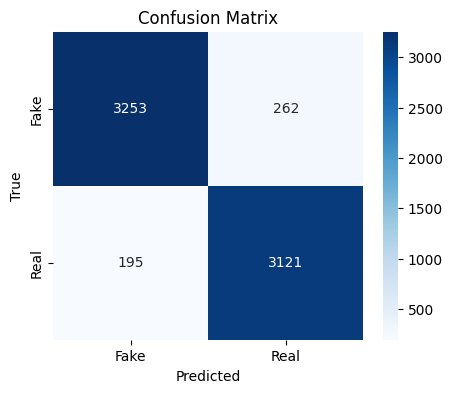

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train_processed, X_test_processed, y_train, and y_validation are already defined and preprocessed

# Vectorize the text data using the previously fitted vectorizer
X_train_tfidf = vectorizer.transform(X_train_processed['headline'])
X_validation_tfidf = vectorizer.transform(X_validation_processed['headline'])


# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_validation_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
print("\n✅ Accuracy:", round(accuracy, 4))
print("\n📊 Classification Report:\n", classification_report(y_validation, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_validation, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

BoW shape: (27321, 5000)

✅ Accuracy (BoW): 0.9255

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      3515
           1       0.93      0.92      0.92      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



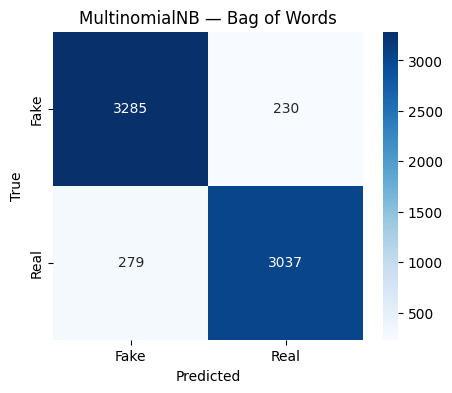

In [66]:
# Your code
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorize using Bag of Words
vectorizer_bow = CountVectorizer(max_features=5000)

# Use the 'headline' column from the processed data for vectorization and convert to list
X_train_bow = vectorizer_bow.fit_transform(X_train_processed['headline'].tolist())
X_validation_bow = vectorizer_bow.transform(X_validation_processed['headline'].tolist())


print("BoW shape:", X_train_bow.shape)

# Train MultinomialNB (default)
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)

# Predict and evaluate
y_pred_bow = model_bow.predict(X_validation_bow)

print("\n✅ Accuracy (BoW):", round(accuracy_score(y_validation, y_pred_bow), 4))
print("\n📊 Classification Report:\n", classification_report(y_validation, y_pred_bow))

# Confusion Matrix
cm = confusion_matrix(y_validation, y_pred_bow)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MultinomialNB — Bag of Words')
plt.show()

In [ ]:
# 6) (Optional) Quick hyperparameter search
# Small grid to avoid overfitting your time.

In [ ]:
# 7) Train on full training data (optional)
# After choosing final settings (pipe or best_model), you can refit on all of df for maximal signal before producing validation predictions.

In [ ]:
# 8) Produce predictions for validation_data.csv
# The file format must be the same as the original, but with label 2 replaced by your predictions (0/1).
# Usually validation_data.csv has label=2 as a placeholder.

In [ ]:
# 9) Accuracy estimation (what to report)
# Report test set metrics from step 5 (or your CV estimates).
# State: test accuracy, precision/recall/F1 for each class, and any notable error patterns (e.g., satire mistaken as fake).

In [ ]:
# 10) (Optional) Nice upgrades
# Use subject: combine with text via ColumnTransformer.
# Use date: extract year/month; sometimes correlates with patterns.
# Calibrate probabilities (CalibratedClassifierCV) if you want threshold tuning.
# Error analysis: inspect top false positives/negatives to refine preprocessing.